In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [2]:
df = pd.read_csv('bhp.csv')
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

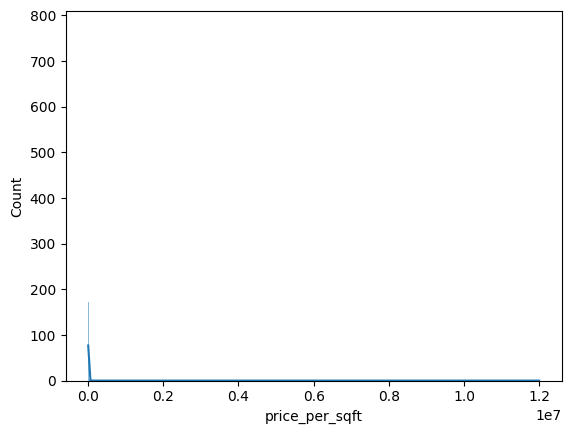

In [3]:
df['price_per_sqft'].describe()
sn.histplot(df['price_per_sqft'], kde=True)


In [4]:
lb = df['price_per_sqft'].quantile(0.001)
ub = df['price_per_sqft'].quantile(0.999)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

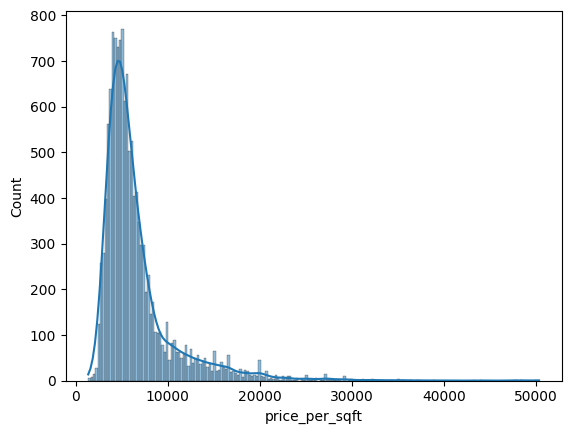

In [5]:
df_new = df[(df['price_per_sqft'] >= lb) & (df['price_per_sqft'] <= ub)]
df_new['price_per_sqft'].describe()
sn.histplot(df_new['price_per_sqft'], kde=True)


In [6]:
df_new.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [7]:
df.shape

(13200, 7)

2. On step(2) dataframe, use 4 standard deviation to remove outliers

In [8]:
m = df_new['price_per_sqft'].mean()
sd = df_new['price_per_sqft'].std()
lb = m - 4 * sd
ub = m + 4 * sd
print(lb, ub)

-9900.429065502582 23227.73653589432


In [9]:
df_new_2 = df_new[(df_new['price_per_sqft'] >= lb) & (df_new['price_per_sqft'] <= ub)]
df_new_2['price_per_sqft'].describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

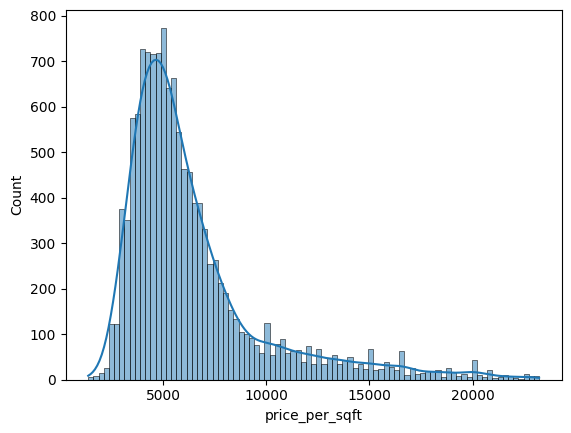

In [10]:
sn.histplot(df_new_2['price_per_sqft'], kde=True)

In [11]:
df_new_2.shape

(13047, 7)

3. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [12]:
df_new['zscore'] = (df_new['price_per_sqft'] - df_new['price_per_sqft'].mean()) / df_new['price_per_sqft'].std()

C:\Users\Hp\AppData\Local\Temp\ipykernel_24304\188807741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['zscore'] = (df_new['price_per_sqft'] - df_new['price_per_sqft'].mean()) / df_new['price_per_sqft'].std()


In [13]:
df_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [14]:
df_new_3 = df_new[(df_new['zscore'] >= -4) & (df_new['zscore'] <= 4)]
df_new_3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


<Axes: xlabel='price_per_sqft', ylabel='Count'>

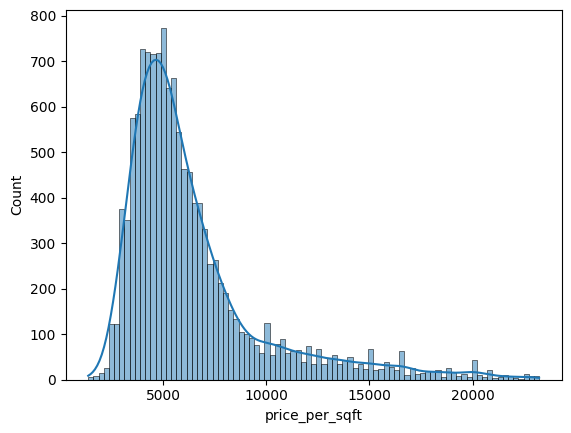

In [15]:
sn.histplot(df_new_3['price_per_sqft'], kde=True)